# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
plt.style.use("ggplot") # ggplot provides a vizualization style I find usuful but if its not allow please comment it out. 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [60]:
# Checking the number of mice.
unique_mice_ids = len(complete_data["Mouse ID"].unique())
unique_mice_ids

249

In [61]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = complete_data[complete_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mouse_ids



array(['g989'], dtype=object)

In [62]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = complete_data[complete_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = complete_data[~complete_data["Mouse ID"].isin(duplicate_mouse_ids)]
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [64]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data["Mouse ID"].unique())

248

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Grouping the data by 'Drug Regimen'
grouped_data = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

# Calculating mean
mean_series = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

# Calculating median
median_series = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

# Calculating variance
var_series = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

# Calculating standard deviation
std_series = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# Calculating SEM 
sem_series = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Now I'll create the summary dataframe with the created variables above. 
summary_stats = pd.DataFrame({"Mean": mean_series,
                              "Median": median_series,
                              "Variance": var_series,
                              "std. Deviation":std_series,
                              "SEM": sem_series})

# Displaying the DataFrame
summary_stats

,Mean,Median,Variance,std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

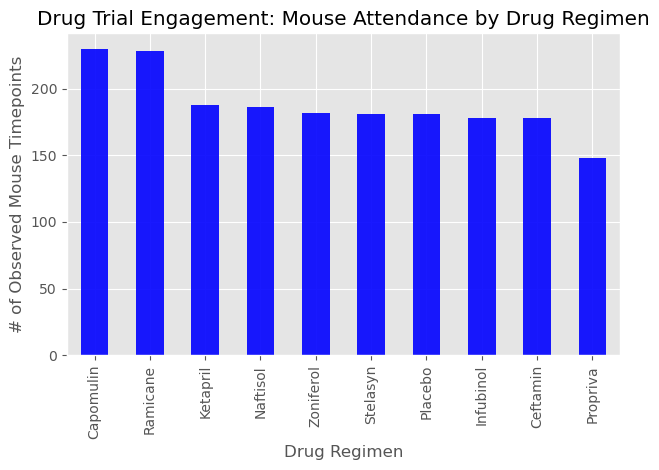

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows_per_regimen = cleaned_data['Drug Regimen'].value_counts()
total_rows_per_regimen.plot(kind='bar', color='blue',alpha=0.90, align="center")
plt.title('Drug Trial Engagement: Mouse Attendance by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.tight_layout()
plt.show()

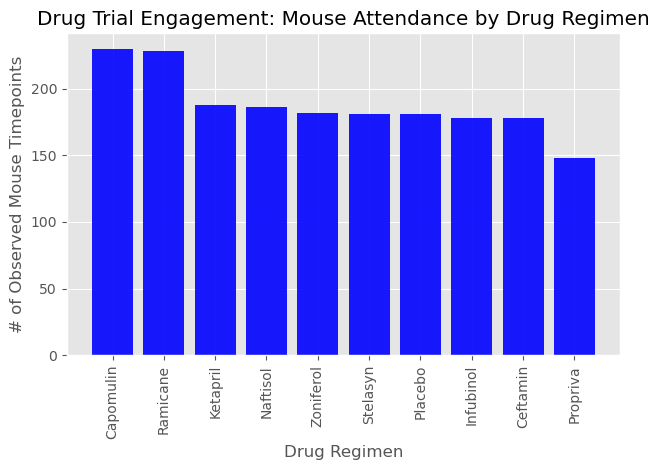

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = total_rows_per_regimen.index

plt.bar(x_axis, total_rows_per_regimen, color='blue',alpha=0.90, align="center")
plt.title("Drug Trial Engagement: Mouse Attendance by Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()



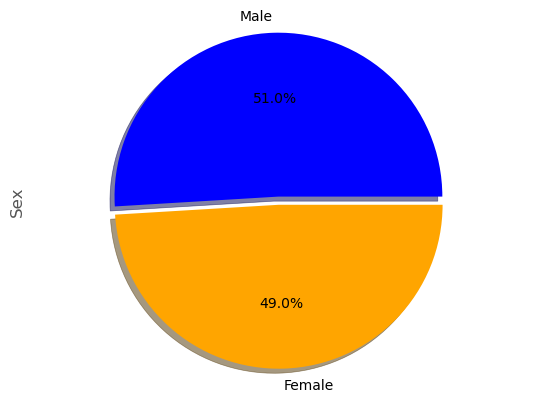

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculate the number of male and female mice
gender_distribution = cleaned_data["Sex"].value_counts()

# Create a pie plot using Pandas
gender_distribution = gender_distribution.plot(kind='pie', autopct='%1.1f%%', 
                                               startangle=360, colors=['blue', 'orange'], shadow=True,explode=[0.05,0])
#plt.title("Sex")
plt.ylabel("Sex")  
plt.axis('equal') 
plt.show()


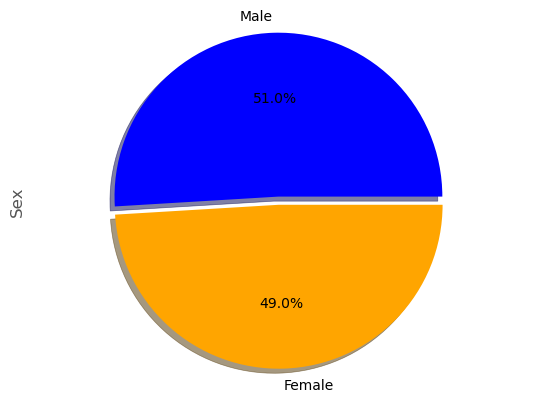

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_distribution = cleaned_data["Sex"].value_counts()

plt.pie(list(gender_distribution), labels=gender_distribution.index, autopct='%1.1f%%', 
        startangle=360, colors=['blue', 'orange'], shadow=True, explode=[0.05, 0])

plt.ylabel("Sex")
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [71]:
#Printing my cleaned DataFrame for better vis 
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df = pd.DataFrame(max_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(cleaned_data, last_timepoint_df, on=['Mouse ID', 'Timepoint'], how='inner')
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27


In [73]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_names:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # Add subset
    tumor_vol_data.append(drug_data)

 # Determine outliers using upper and lower bounds
for i, drug in enumerate(treatment_names):
    quartiles = tumor_vol_data[i].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    # Outliers detection
    outliers = tumor_vol_data[i][(tumor_vol_data[i] < lower_bound) | (tumor_vol_data[i] > upper_bound)]
    print(f"Potential outliers for {drug}: {outliers}")
   


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


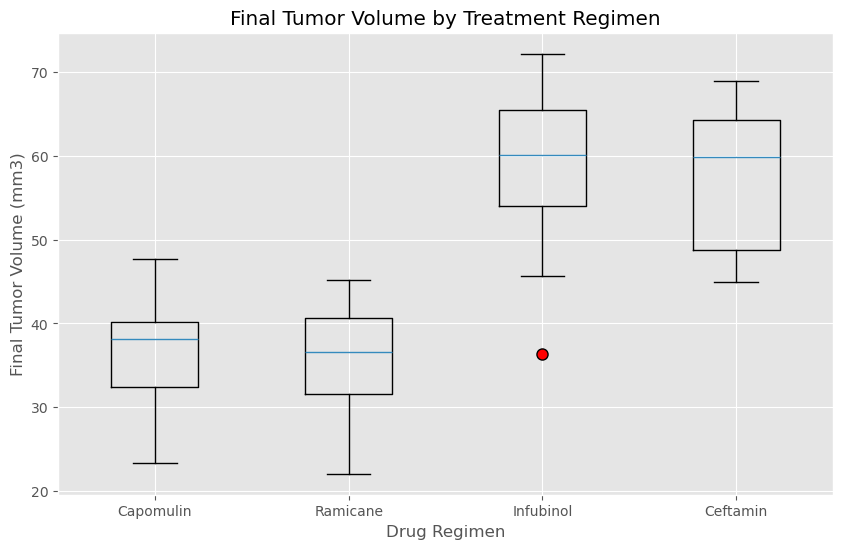

In [74]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(10,6))
plt.boxplot(tumor_vol_data, labels=treatment_names, flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.title('Final Tumor Volume by Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

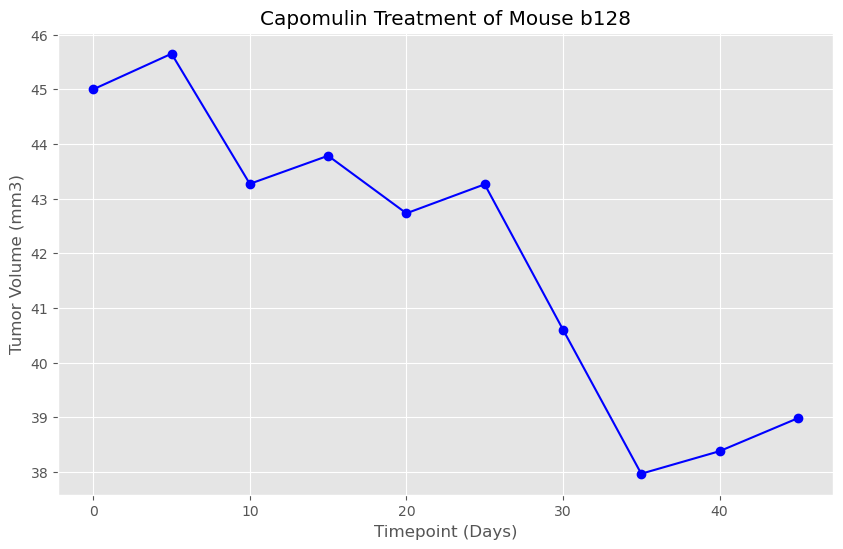

In [75]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#mouse id = b128 first mouse in my dataframe 
                               
# Select a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
mouse_b128_data = capomulin_data[capomulin_data['Mouse ID'] == "b128"]

time_points = mouse_b128_data['Timepoint']
tumor_volumes = mouse_b128_data['Tumor Volume (mm3)']


# Generate a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(time_points, tumor_volumes, marker='o', color='b')
plt.title('Capomulin Treatment of Mouse b128')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


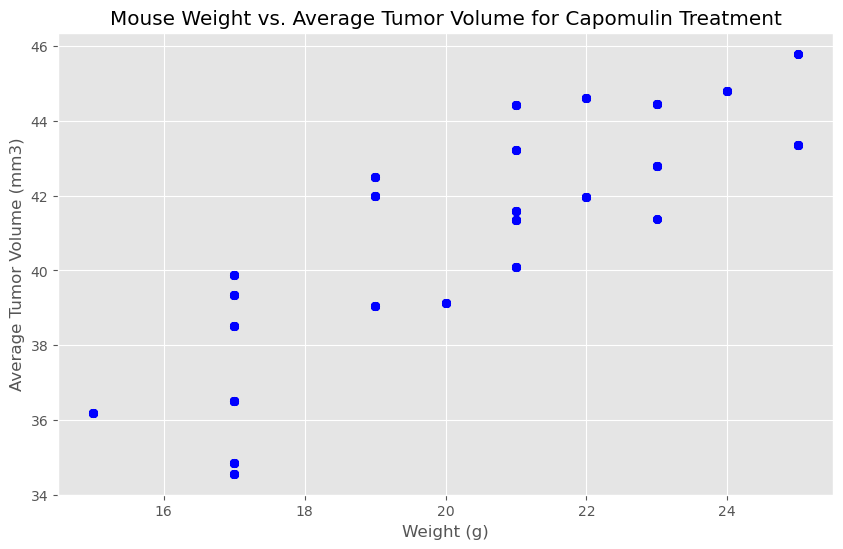

In [76]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Weight (g)

mouse_vol = capomulin_data.groupby('Mouse ID')["Tumor Volume (mm3)"].mean()
mouse_vol_df = pd.DataFrame(mouse_vol)

capomulin_data_df = pd.merge(capomulin_data,mouse_vol_df , how="inner", on="Mouse ID")
capomulin_data_df = capomulin_data_df.rename(columns={"Tumor Volume (mm3)_y": "Tumor Vol mean"})

# Generate scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_data_df['Weight (g)'], capomulin_data_df['Tumor Vol mean'], color='blue')  # Using 'Tumor Vol mean' instead of 'Tumor Volume (mm3)'
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Treatment")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8343958614425953


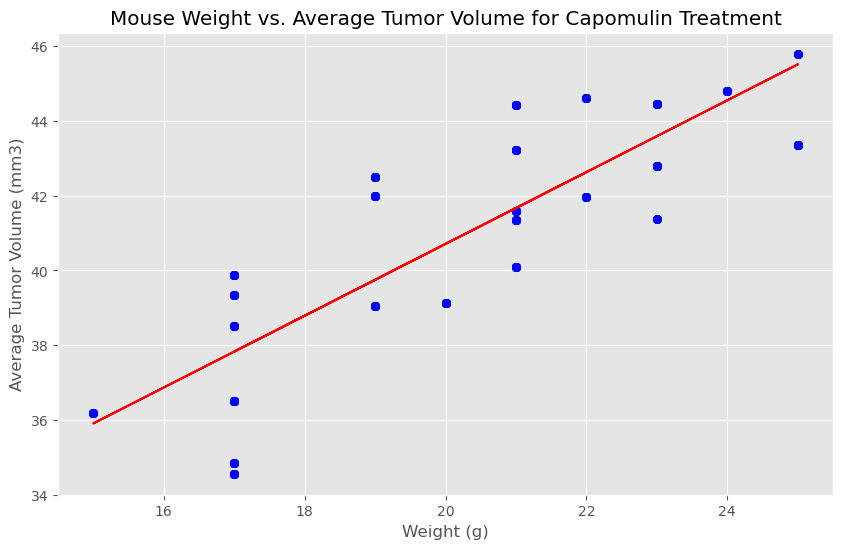

In [228]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate correlation coefficient
correlation_coefficient, _ = st.pearsonr(capomulin_data_df['Weight (g)'], capomulin_data_df['Tumor Vol mean'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

# Calculate linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_data_df['Weight (g)'], capomulin_data_df['Tumor Vol mean'])

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_data_df['Weight (g)'], capomulin_data_df['Tumor Vol mean'], color='blue', label='Data Points')

# Plot the linear regression line
plt.plot(capomulin_data_df['Weight (g)'], slope * capomulin_data_df['Weight (g)'] + intercept, color='red', label='Linear Regression')

plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Treatment")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

